# Imports

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [71]:
data = pd.read_csv('../data/application_train_vf.csv')
# validation = pd.read_csv('./data/application_test_vf.csv')
# bureau = pd.read_csv('./data/bureau.csv')
# credit_card = pd.read_csv('./data/credit_card_balance.csv')
# bureau_balance = pd.read_csv('./data/bureau_balance.csv')
# install_pay = pd.read_csv('./data/installments_payments.csv')
# pos_cash = pd.read_csv('./data/POS_CASH_balance.csv')
# previous_app = pd.read_csv('./data/previous_application.csv')

# Dates

In [72]:
data['date_mensuelle'] = pd.to_datetime(data['date_mensuelle'])

In [73]:
data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,date_mensuelle
0,0,333721,0,Cash loans,M,Y,Y,1,292500.0,1102500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2013-01-01
1,1,250254,0,Cash loans,F,N,Y,0,180000.0,270000.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,5.0,2013-01-01
2,2,265071,0,Cash loans,F,Y,N,2,67500.0,80865.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-01
3,3,227569,0,Cash loans,F,Y,Y,1,157500.0,1078200.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-01
4,4,212616,0,Cash loans,F,N,N,1,112500.0,225000.0,...,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0,2013-01-01


## Study of some datas

cibles : ['ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE']

In [74]:
data = data[['ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE',"TARGET","date_mensuelle"]]
data.head()

,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,...,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,TARGET,date_mensuelle
0,0.282,0.2414,0.3750,NaN,0.1377,NaN,0.0672,NaN,0.003,0.2967,...,0.0029,NaN,block of flats,0.2379,Panel,No,1.0,0.0,0,2013-01-01
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,2013-01-01
2,0.000,0.2759,0.1667,NaN,0.0694,NaN,0.1149,NaN,0.000,0.1249,...,0.0000,NaN,block of flats,0.1210,"Stone, brick",No,0.0,0.0,0,2013-01-01
3,0.000,0.1034,0.1667,0.2083,0.0000,0.0551,0.0517,0.0,0.000,0.0625,...,0.0000,reg oper account,block of flats,0.0390,Block,No,0.0,0.0,0,2013-01-01
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,2013-01-01


# Missing values

## Variables catégorielles

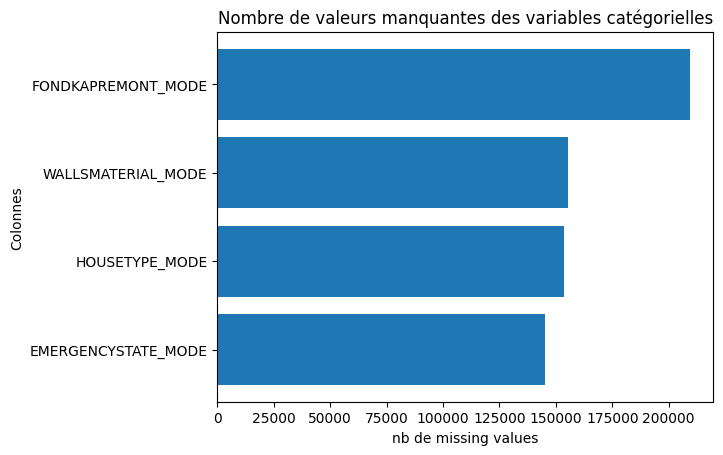

In [75]:
missing_values = data.select_dtypes(include = 'object').isna().sum()

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('nb de missing values')
plt.ylabel('Colonnes')
plt.title('Nombre de valeurs manquantes des variables catégorielles')

plt.show()

In [76]:
nb_missing = data.isna().sum()/data.shape[0]*100

for i in data.columns:
    if nb_missing[i] > 1:
        print(i, nb_missing[i])


ELEVATORS_MODE 53.267974923801155
ENTRANCES_MODE 50.31802604971464
FLOORSMAX_MODE 49.73064974012355
FLOORSMIN_MODE 67.82562960010715
LANDAREA_MODE 59.35146860411555
LIVINGAPARTMENTS_MODE 68.33492863606516
LIVINGAREA_MODE 50.16677174974764
NONLIVINGAPARTMENTS_MODE 69.41232967557096
NONLIVINGAREA_MODE 55.15326340135965
APARTMENTS_MEDI 50.71788622932504
BASEMENTAREA_MEDI 58.49327196045827
YEARS_BEGINEXPLUATATION_MEDI 48.75354042867364
YEARS_BUILD_MEDI 66.4741413950024
COMMONAREA_MEDI 69.85498534826058
ELEVATORS_MEDI 53.267974923801155
ENTRANCES_MEDI 50.31802604971464
FLOORSMAX_MEDI 49.73064974012355
FLOORSMIN_MEDI 67.82562960010715
LANDAREA_MEDI 59.35146860411555
LIVINGAPARTMENTS_MEDI 68.33492863606516
LIVINGAREA_MEDI 50.16677174974764
NONLIVINGAPARTMENTS_MEDI 69.41232967557096
NONLIVINGAREA_MEDI 55.15326340135965
FONDKAPREMONT_MODE 68.36367675355349
HOUSETYPE_MODE 50.14357724586501
TOTALAREA_MODE 48.2403211948763
WALLSMATERIAL_MODE 50.81327771008177
EMERGENCYSTATE_MODE 47.368403858781406

## Variables indicatrices

TARGET    0
dtype: int64


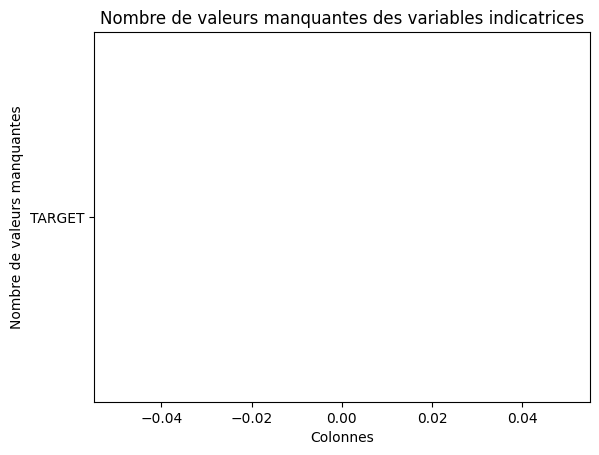

In [77]:
missing_values = data.select_dtypes(include = 'int').isna().sum()

missing_values = missing_values.sort_values(ascending=True)
print(missing_values)
plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables indicatrices')

plt.show()

## Variables continues

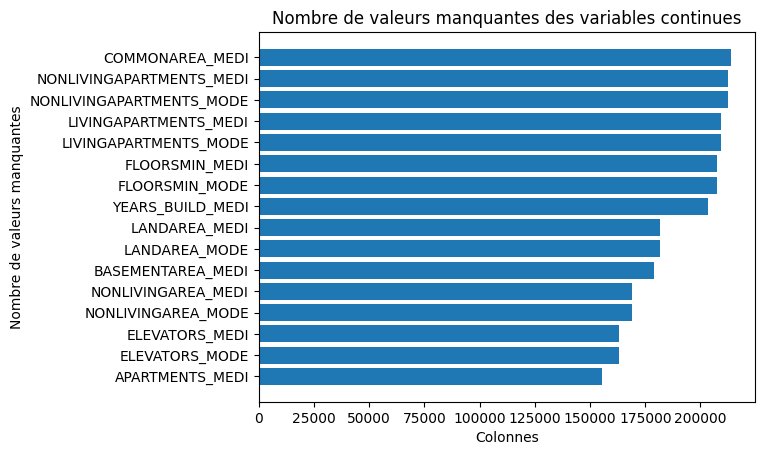

In [78]:
missing_values = data.select_dtypes(include = 'float').isna().sum()

missing_values = missing_values[missing_values>=155000]

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables continues')

plt.show()

In [79]:
nb_missing = missing_values/data.shape[0]*100
nb_missing

APARTMENTS_MEDI             50.717886
ELEVATORS_MODE              53.267975
ELEVATORS_MEDI              53.267975
NONLIVINGAREA_MODE          55.153263
NONLIVINGAREA_MEDI          55.153263
BASEMENTAREA_MEDI           58.493272
LANDAREA_MODE               59.351469
LANDAREA_MEDI               59.351469
YEARS_BUILD_MEDI            66.474141
FLOORSMIN_MODE              67.825630
FLOORSMIN_MEDI              67.825630
LIVINGAPARTMENTS_MODE       68.334929
LIVINGAPARTMENTS_MEDI       68.334929
NONLIVINGAPARTMENTS_MODE    69.412330
NONLIVINGAPARTMENTS_MEDI    69.412330
COMMONAREA_MEDI             69.854985
dtype: float64

In [80]:
#for i in data.columns:
#    if nb_missing[i] > 30:
#        print(i, nb_missing[i])
#        print("colonne à supprimer")


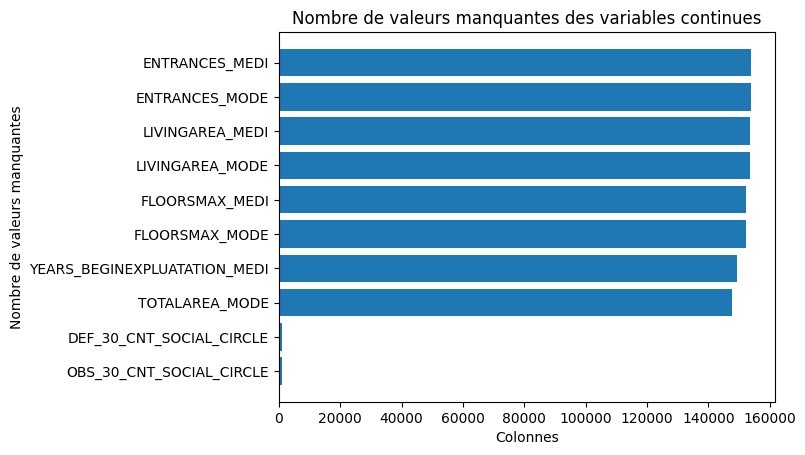

In [81]:
missing_values = data.select_dtypes(include = 'float').isna().sum()

missing_values = missing_values[missing_values<155000]

missing_values = missing_values.sort_values(ascending=True)

plt.barh(missing_values.index, missing_values.values)

plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Nombre de valeurs manquantes des variables continues')

plt.show()

In [82]:
nb_missing = missing_values/data.shape[0]*100
nb_missing

OBS_30_CNT_SOCIAL_CIRCLE         0.332890
DEF_30_CNT_SOCIAL_CIRCLE         0.332890
TOTALAREA_MODE                  48.240321
YEARS_BEGINEXPLUATATION_MEDI    48.753540
FLOORSMAX_MODE                  49.730650
FLOORSMAX_MEDI                  49.730650
LIVINGAREA_MODE                 50.166772
LIVINGAREA_MEDI                 50.166772
ENTRANCES_MODE                  50.318026
ENTRANCES_MEDI                  50.318026
dtype: float64

# Variables categorielles

In [83]:
for col in data.select_dtypes(include ='object').columns:
    print(f"{col} : {data[col].nunique()} catégories différentes")


FONDKAPREMONT_MODE : 4 catégories différentes
HOUSETYPE_MODE : 3 catégories différentes
WALLSMATERIAL_MODE : 7 catégories différentes
EMERGENCYSTATE_MODE : 2 catégories différentes


# Variables numériques

/Users/SamuelLP/Desktop/git/Challenge_Nexialog/.nexialog_venv/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/SamuelLP/Desktop/git/Challenge_Nexialog/.nexialog_venv/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/SamuelLP/Desktop/git/Challenge_Nexialog/.nexialog_venv/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/SamuelLP/Desktop/git/Challenge_Nexialog/.nexialog_venv/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGr

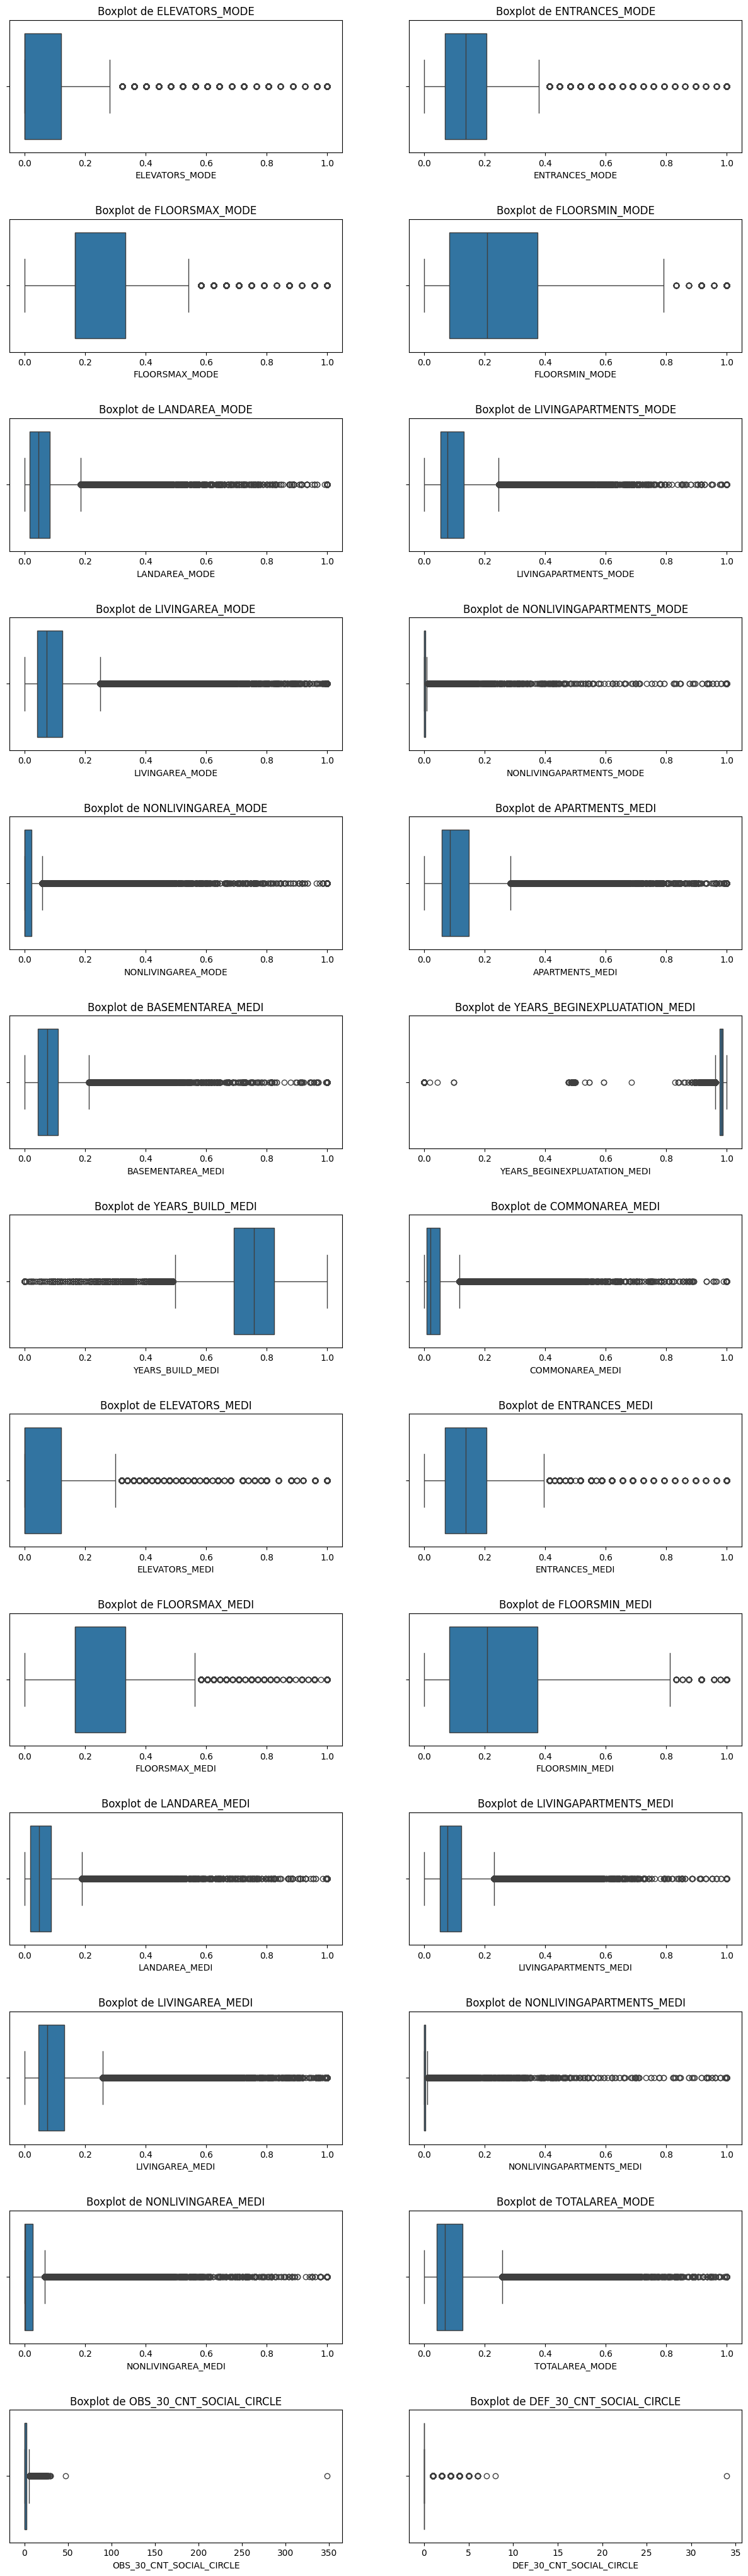

In [84]:
float_columns = data.select_dtypes(include='float').columns

num_cols = 2
num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(float_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

plt.show()

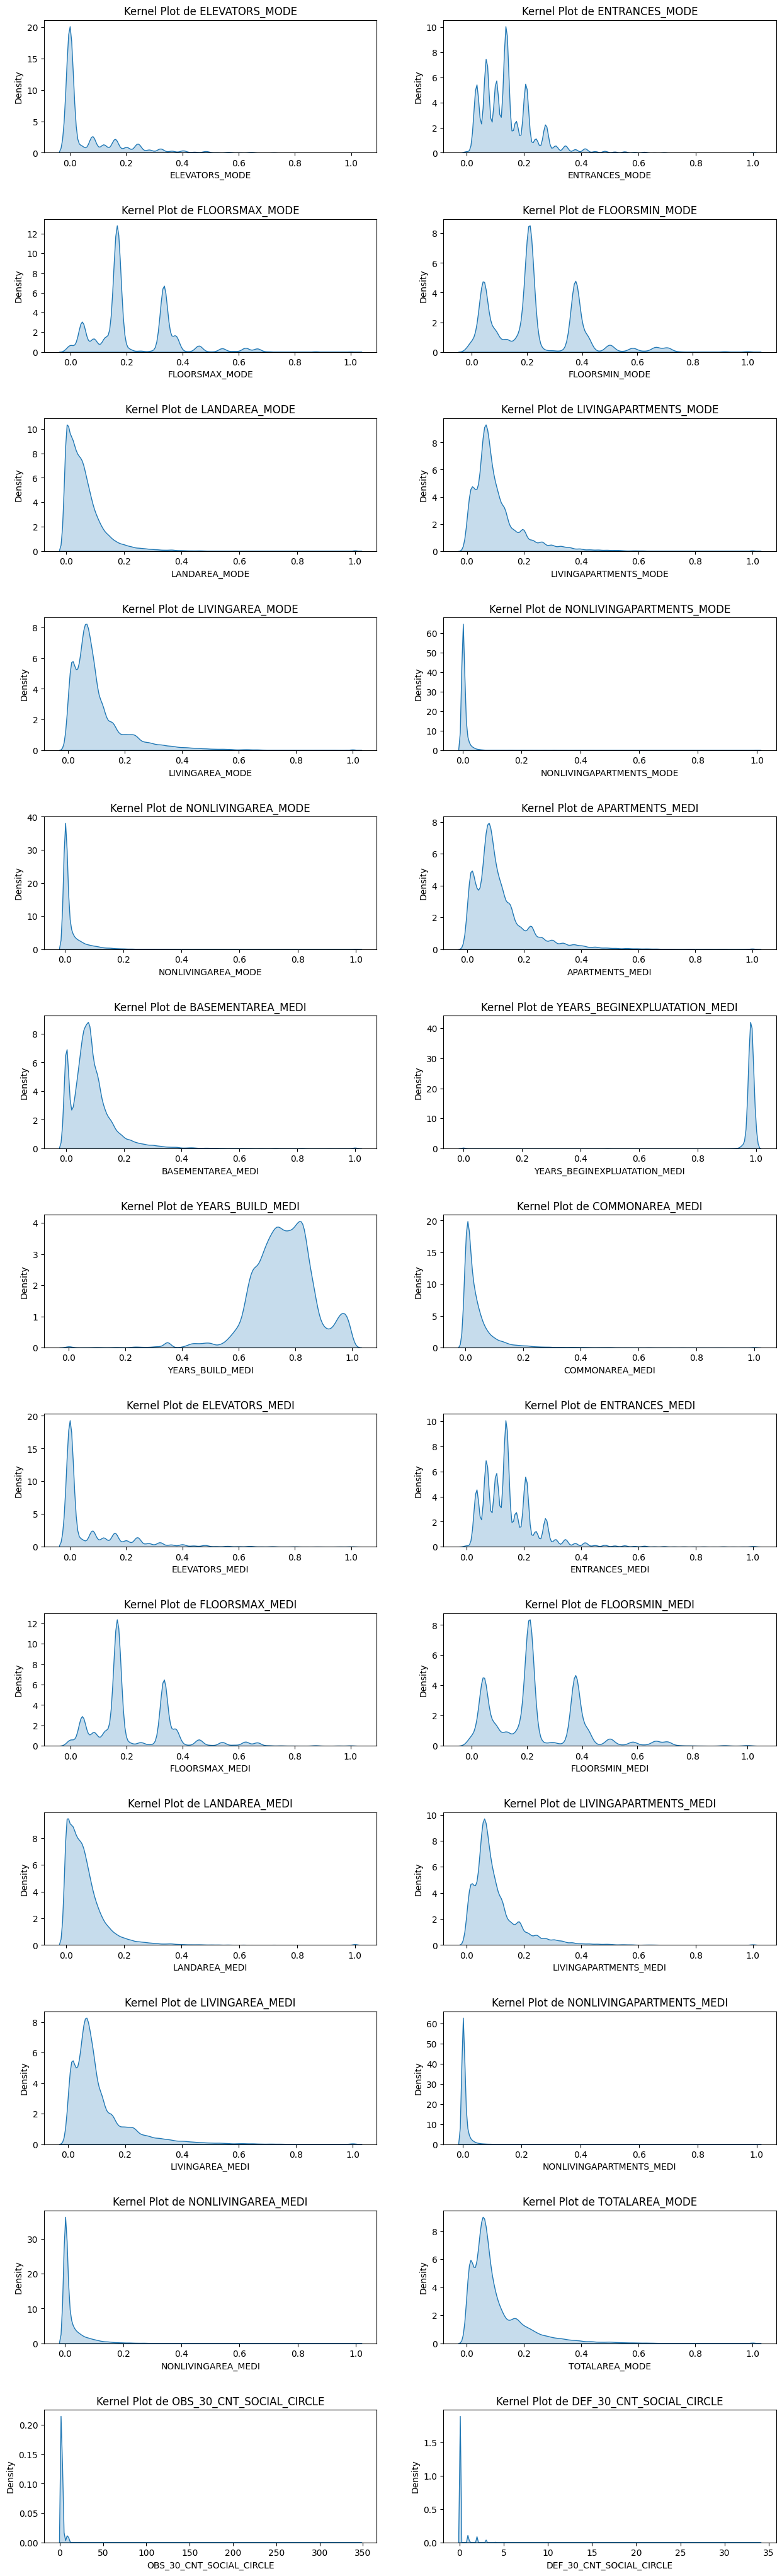

In [85]:
float_columns = data.select_dtypes(include='float').columns

num_cols = 2
num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(float_columns):
    sns.kdeplot(x=data[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Kernel Plot de {col}')

plt.show()

# Corrélations entre variables numériques

In [86]:
import numpy as np
corr_matrix = data.select_dtypes(include='number').corr(method='spearman')

In [87]:
col_corr = np.transpose(corr_matrix[np.abs(corr_matrix['TARGET'])>0.05]).columns
corr = corr_matrix.loc[col_corr,col_corr]

## Discrétisation

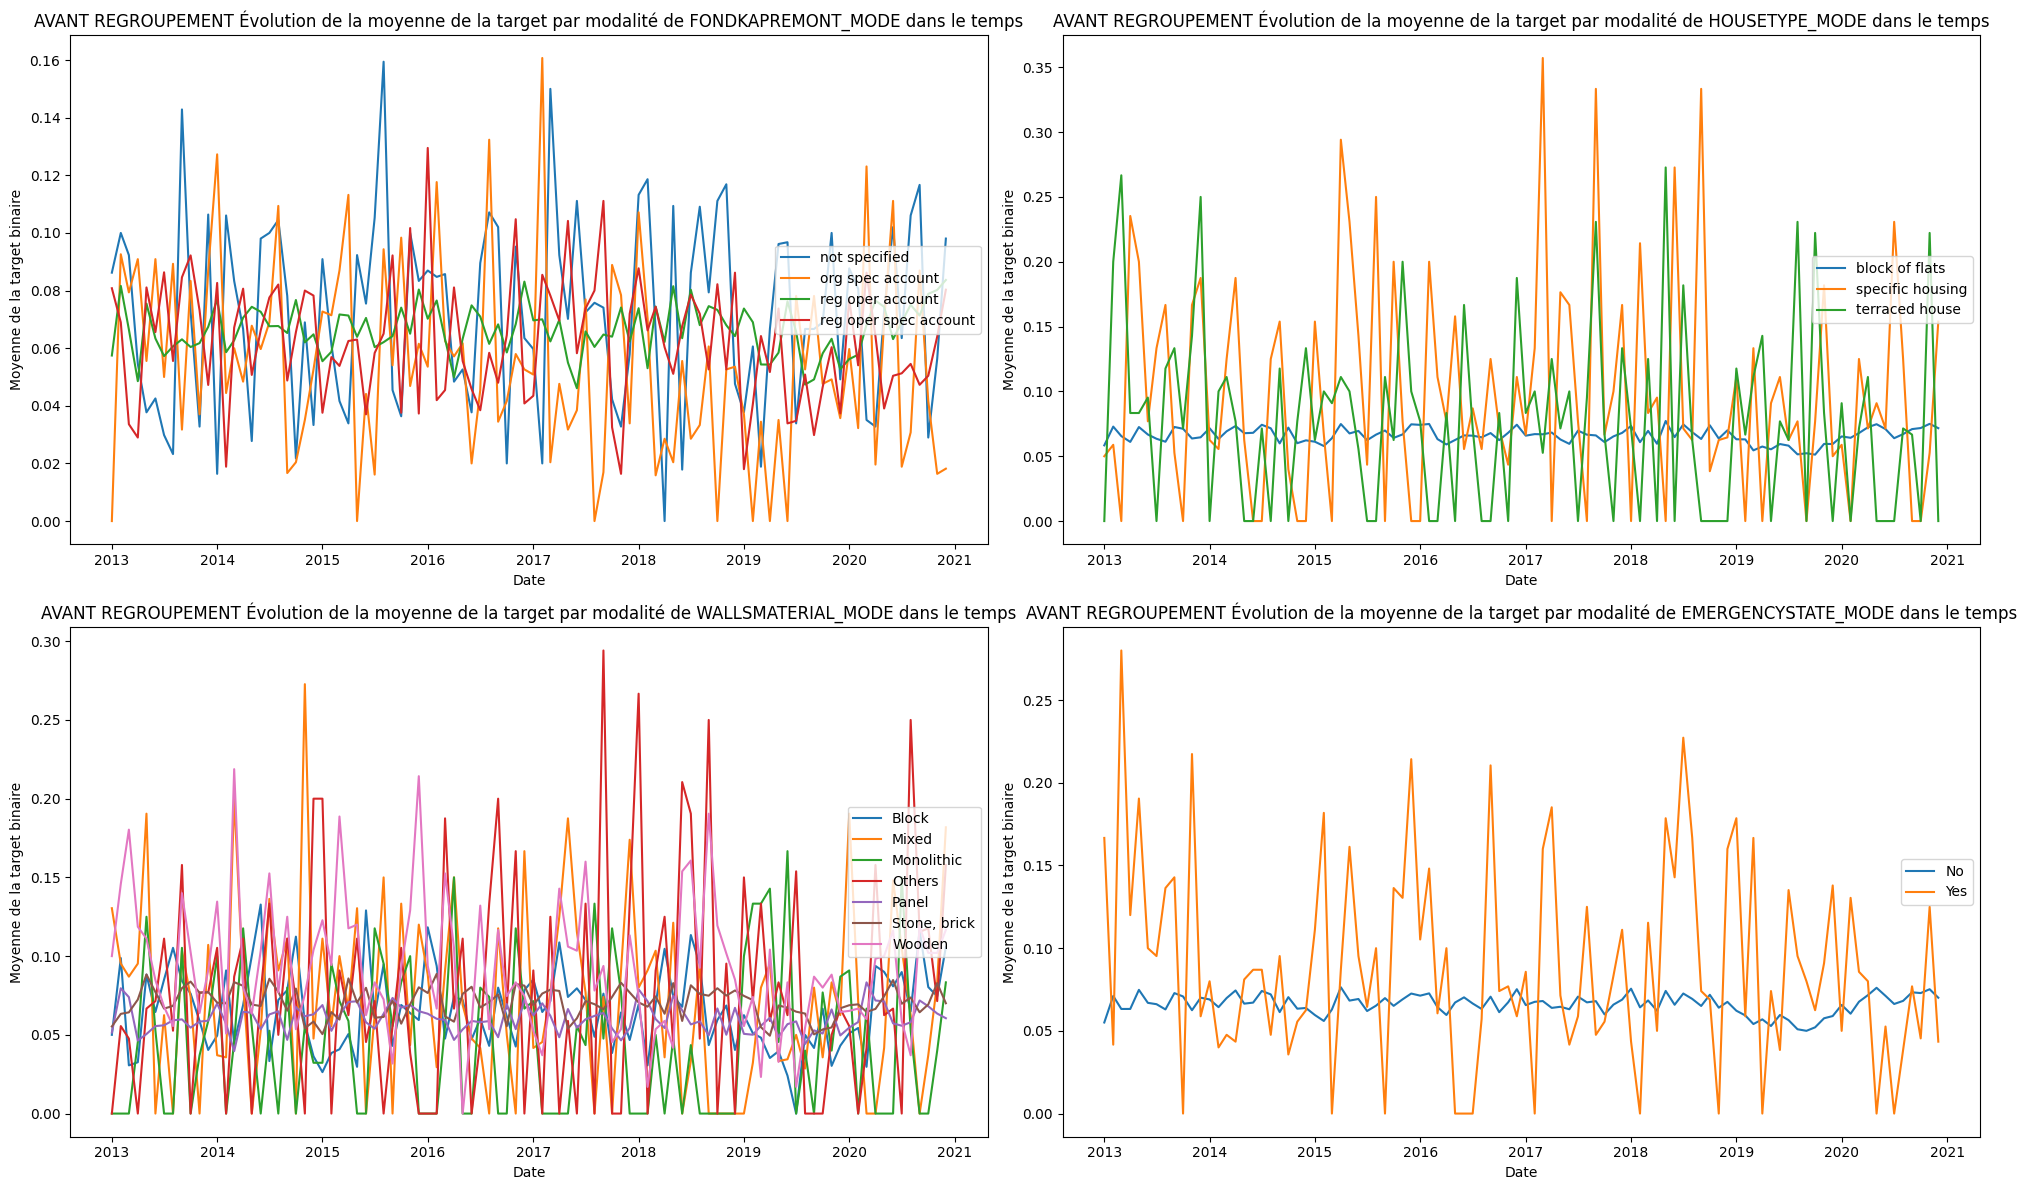

In [88]:
import matplotlib.pyplot as plt

n_cols = 2 
n_rows = (len(data.select_dtypes(include='object').columns) + 1) // n_cols

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 6 * n_rows))

for idx, col in enumerate(data.select_dtypes(include='object').columns):

    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
    
    ax = axs[idx // n_cols, idx % n_cols]

    for genre, group in result.groupby(f'{col}'):
        ax.plot(group['date_mensuelle'], group['TARGET'], label=f'{genre}')
    
    ax.legend(loc='right')
    ax.set_xlabel('Date')
    ax.set_ylabel('Moyenne de la target binaire')
    ax.set_title(f'AVANT REGROUPEMENT Évolution de la moyenne de la target par modalité de {col} dans le temps')

plt.tight_layout()
plt.show()



variable à discrétiser : 
- FONDKAPREMONT_MODE
- HOUSETYPE_MODE
- WALLSMATERIAL_MODE


# TODO
- faire par les moyennes
- 4 mod par moyenne max
- regarder répartition des catégories

### Faire par les moyennes - variables catégorielles
cols = ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE']


## FONDKAPREMONT_MODE

In [89]:
list_mean = []
for cat in data['FONDKAPREMONT_MODE'].unique():
    moyenne = data[data['FONDKAPREMONT_MODE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['fondkapremont'] = data['FONDKAPREMONT_MODE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

,moyenne,fondkapremont
0,0.072525,not specified
1,0.066343,reg oper account
2,0.062157,reg oper spec account
3,0.054841,org spec account


In [90]:
not_specified = ['not specified']
reg = ["reg oper account", "reg oper spec account", "org spec account"]  
# not_alone = ['Spouse, partner', 'Family', 'Children']

data['fondkapremont'] = np.select(
    [
        data['FONDKAPREMONT_MODE'].isin(not_specified),
        data['FONDKAPREMONT_MODE'].isin(reg),
        # data['NAME_TYPE_SUITE'].isin(not_alone)
    ],
    ['not_specified', 'reg'],
    default='not_specified')

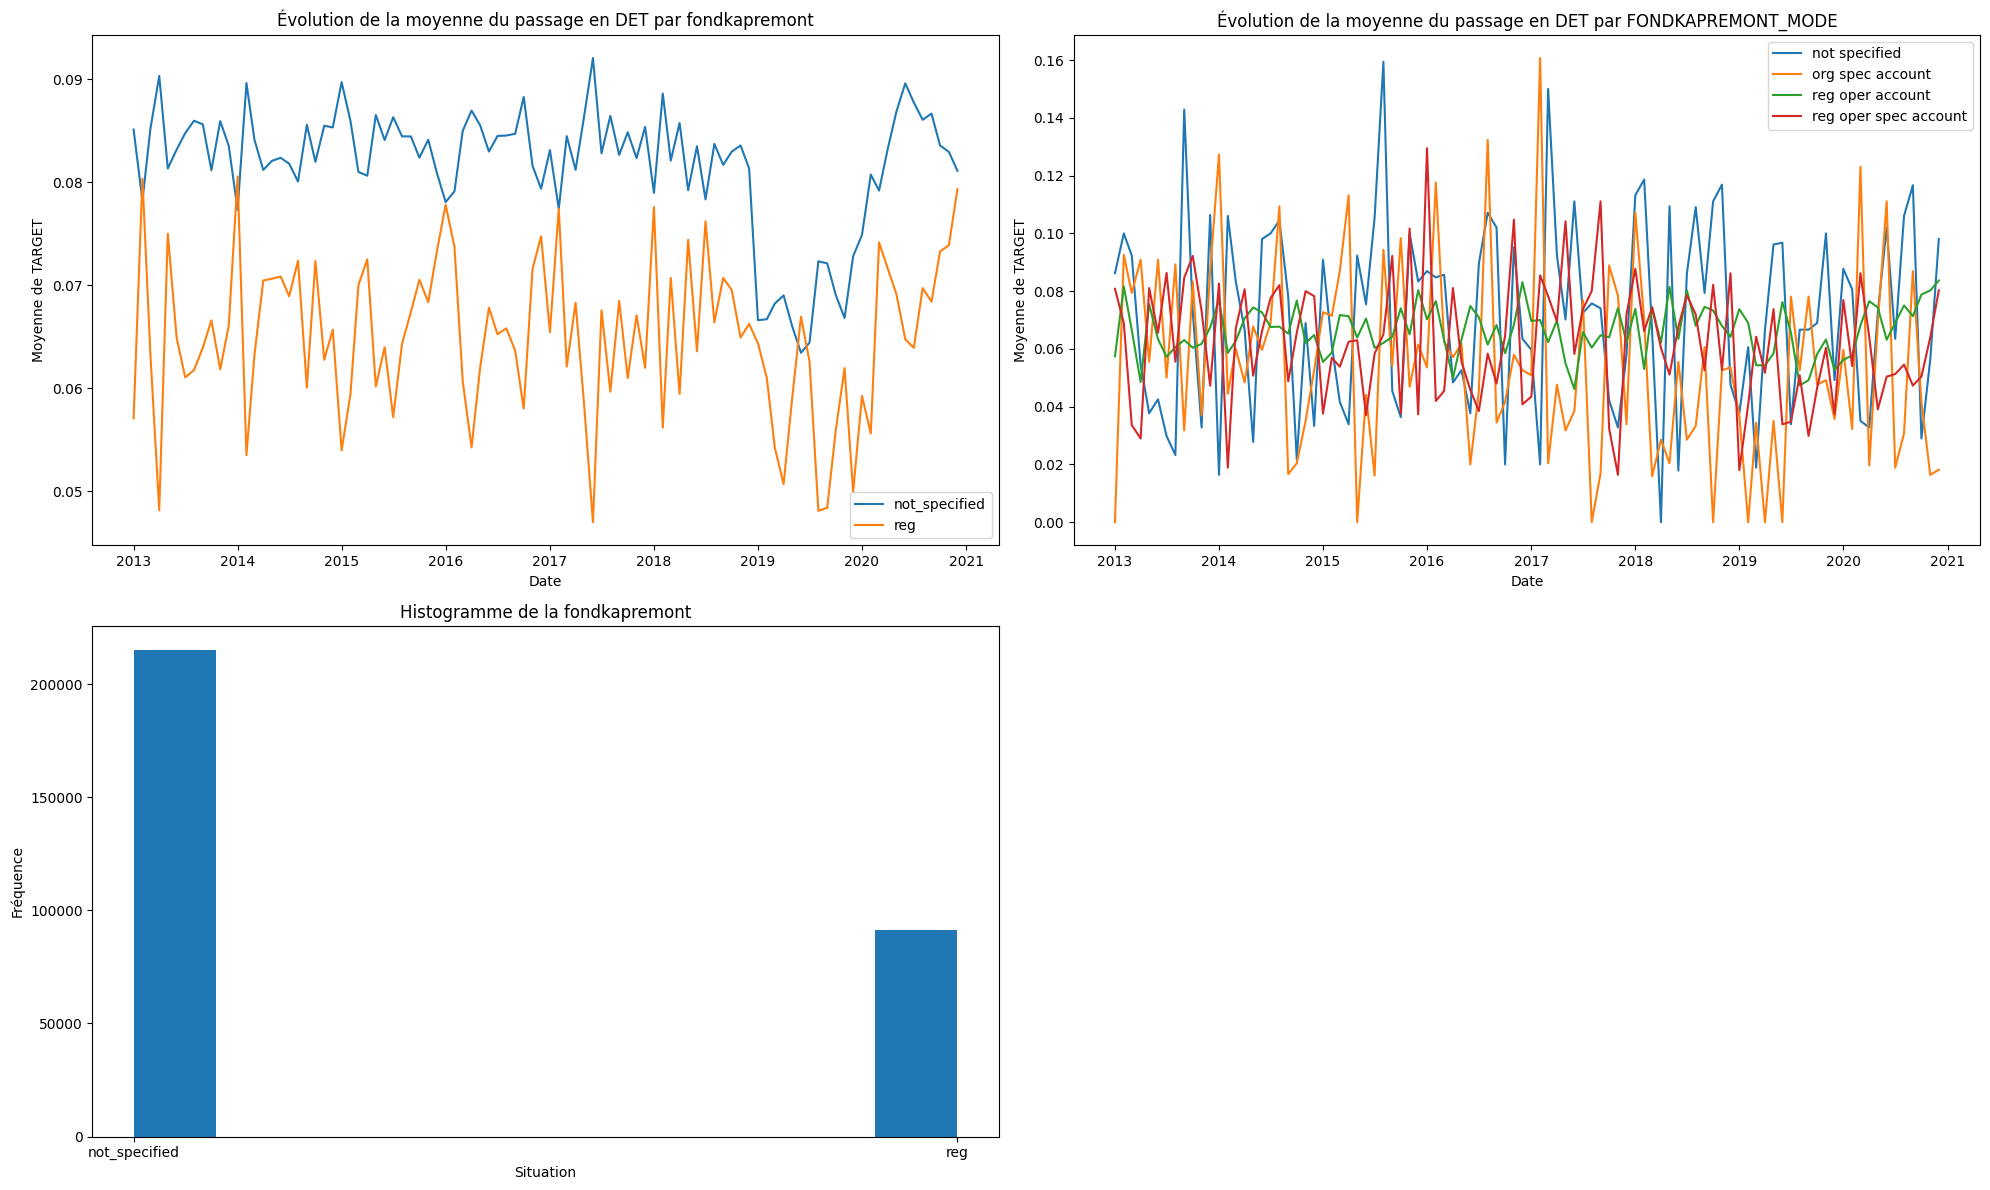

In [91]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['fondkapremont', 'FONDKAPREMONT_MODE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

# Histogramme pour la 'fondkapremont' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["fondkapremont"])
axes[1, 0].set_title('Histogramme de la fondkapremont')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## HOUSETYPE_MODE

In [92]:
list_mean = []
for cat in data['HOUSETYPE_MODE'].unique():
    moyenne = data[data['HOUSETYPE_MODE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['HOUSETYPE'] = data['HOUSETYPE_MODE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

,moyenne,HOUSETYPE
0,0.095366,specific housing
1,0.077371,terraced house
2,0.066041,block of flats


In [93]:
houses = ['specific housing', "terraced house"]
appartment = ["block of flats"]
# other = ['State servant', 'Pensioner', 'Student']

data['HOUSETYPE'] = np.select(
    [
        data['HOUSETYPE_MODE'].isin(houses),
        data['HOUSETYPE_MODE'].isin(appartment),
        # data['NAME_INCOME_TYPE'].isin(other)
    ],
    ['houses', 'appartment'],
    default='houses')

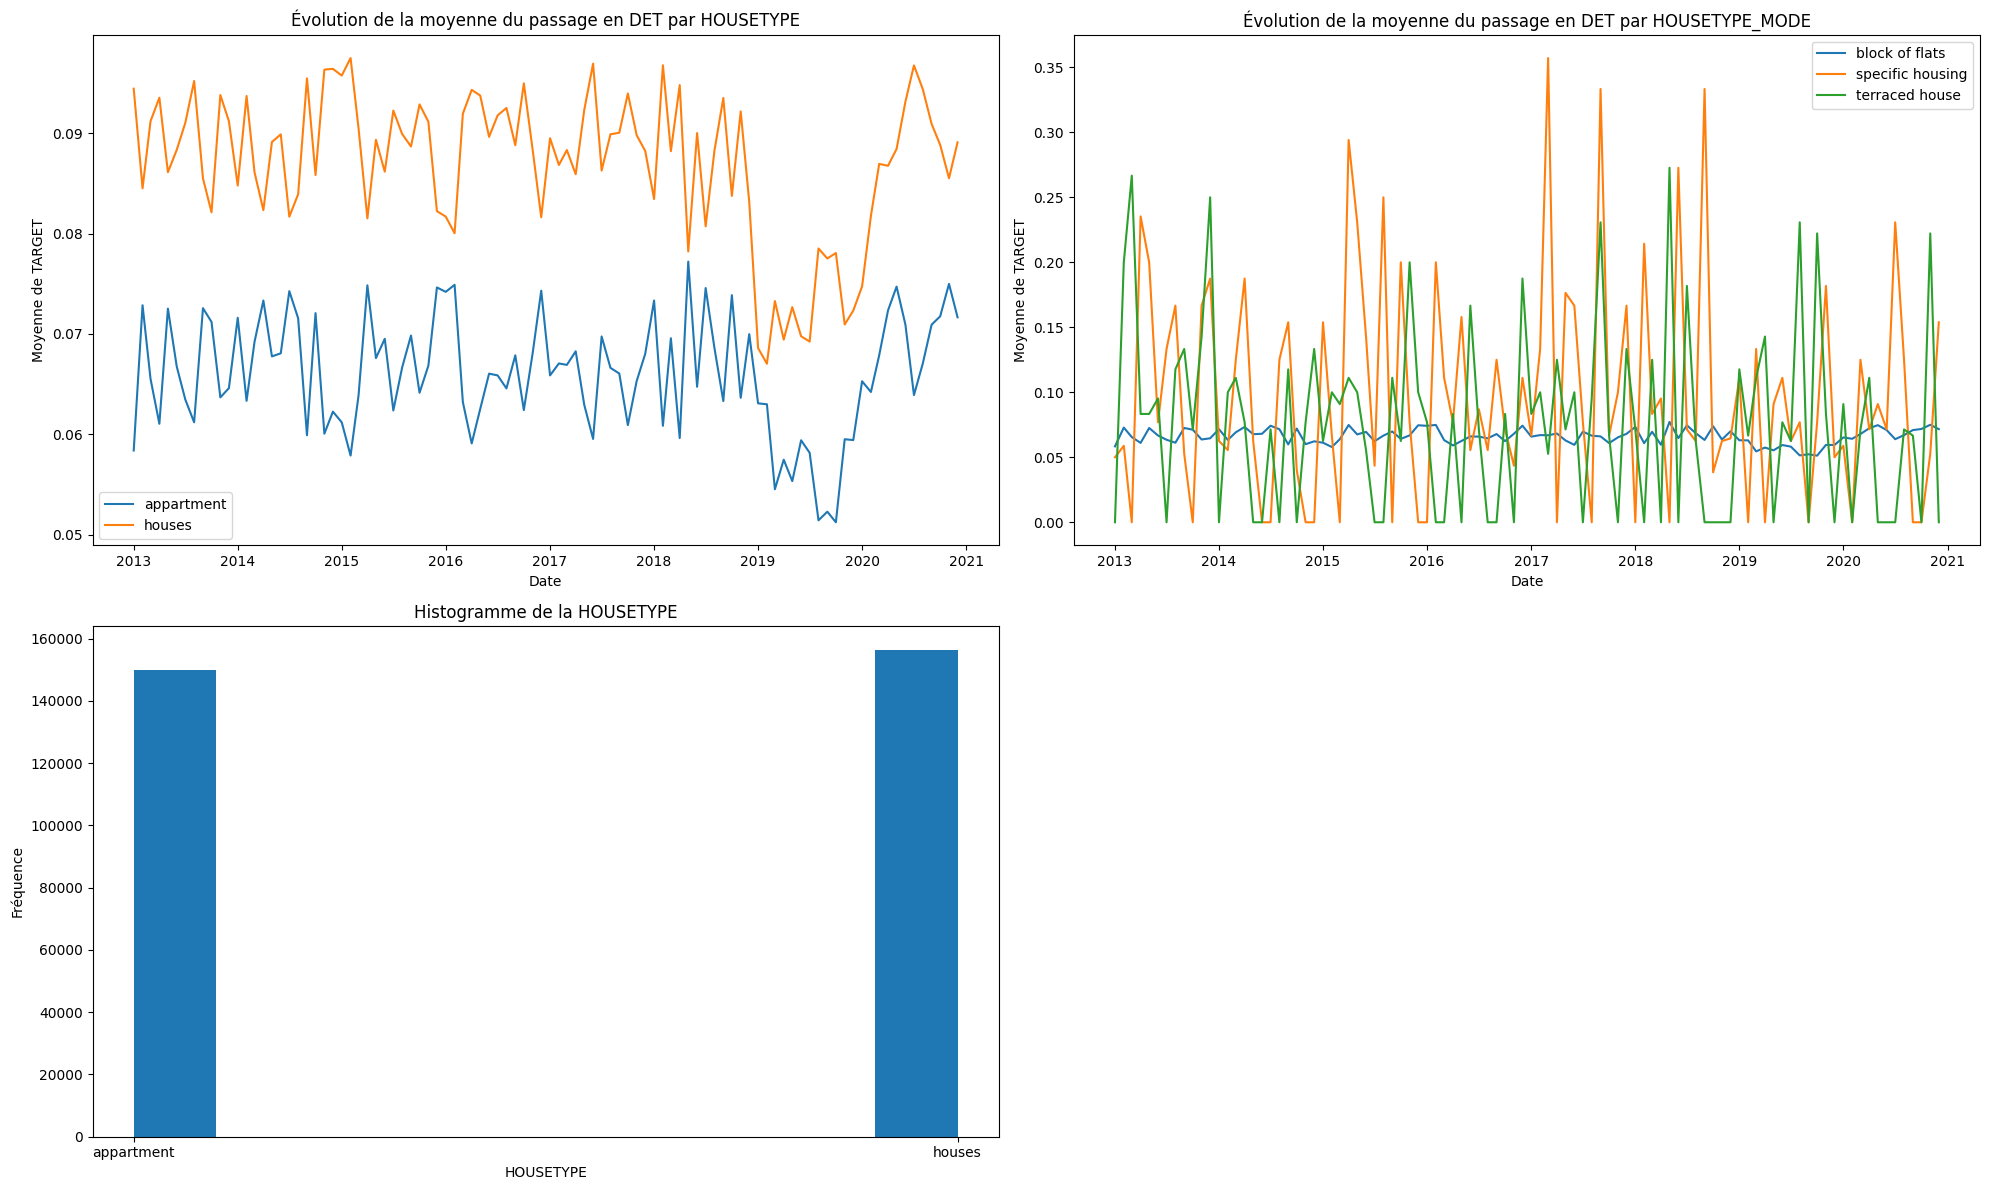

In [94]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['HOUSETYPE', 'HOUSETYPE_MODE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

# Histogramme pour la 'Situation' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["HOUSETYPE"])
axes[1, 0].set_title('Histogramme de la HOUSETYPE')
axes[1, 0].set_xlabel('HOUSETYPE')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## WALLSMATERIAL_MODE

In [95]:
list_mean = []
for cat in data['WALLSMATERIAL_MODE'].unique():
    moyenne = data[data['WALLSMATERIAL_MODE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['WALLSMATERIAL'] = data['WALLSMATERIAL_MODE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

,moyenne,WALLSMATERIAL
0,0.092238,Wooden
1,0.079110,Others
2,0.071304,Mixed
3,0.070500,"Stone, brick"
4,0.065732,Block
5,0.060187,Panel
6,0.044532,Monolithic


In [96]:
natural = ["Wooden", "Stone, brick"]
created = ["Block","Mixed", "Panel", "Monolithic"]
other = ["Others"]

data['WALLSMATERIAL'] = np.select(
    [
        data['WALLSMATERIAL_MODE'].isin(natural),
        data['WALLSMATERIAL_MODE'].isin(created),
        data['WALLSMATERIAL_MODE'].isin(other)
    ],
    ['natural', 'created',"other"],
    default='natural')

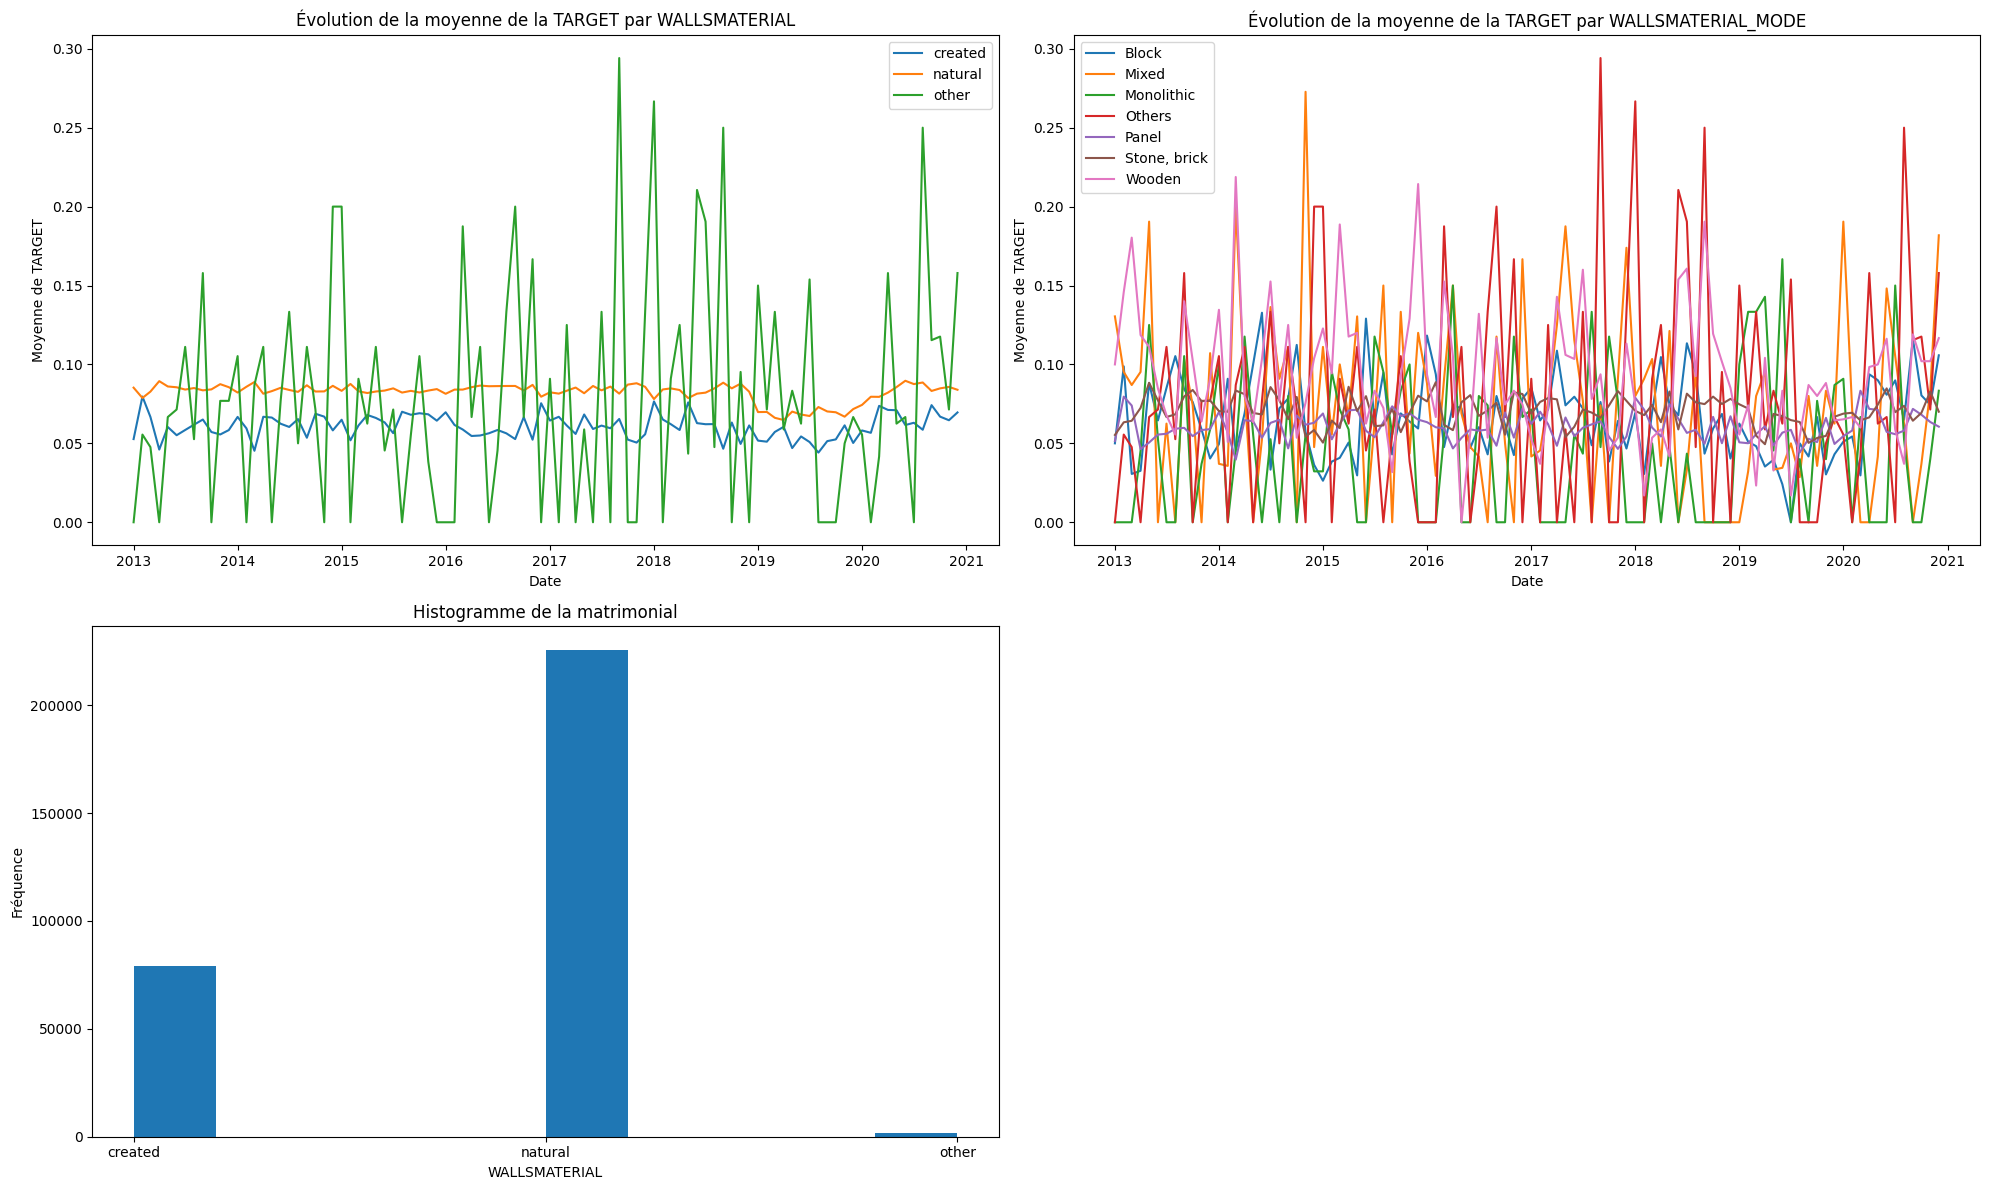

In [97]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
axes[1, 1].axis('off')  # Désactiver le quatrième subplot (en bas à droite)

for idx, col in enumerate(data[['WALLSMATERIAL', 'WALLSMATERIAL_MODE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'Skilled' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["WALLSMATERIAL"])
axes[1, 0].set_title('Histogramme de la matrimonial')
axes[1, 0].set_xlabel('WALLSMATERIAL')
axes[1, 0].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


CATEGORIELLES A POTENTIELLEMENT GARDER APRES DISCRETISATION : 
- HOUSETYPE_MODE 
- FONDKAPREMONT_MODE (attention aux croisements/déséquilibre)

VARIABLE A JETER :
- WALLSMATERIAL_MODE
- EMERGENCYSTATE_MODE

## DISCRETISATION DES VARIABLES NUMERIQUES

In [98]:
data["OBS_30_CNT_SOCIAL_CIRCLE"].unique()

array([  1.,   0.,   4.,   6.,   2.,   3.,   8.,   5.,   7.,  10.,   9.,
        12.,  13.,  17.,  nan,  16.,  23.,  11.,  21.,  15.,  14.,  18.,
        24.,  22.,  20.,  19.,  25.,  27.,  26.,  29.,  30., 348.,  28.,
        47.])

In [99]:
for i in data.select_dtypes(include=['float64', 'int64']).columns:
    if data[i].isna().sum() / len(data[i]) * 100 > 30:
        print(i, data[i].isna().sum() / len(data[i]) * 100)
        data.drop(columns = i, axis = 1, inplace= True)
    else : data[i].fillna(data[i].mode()[0], inplace = True)

ELEVATORS_MODE 53.267974923801155
ENTRANCES_MODE 50.31802604971464
FLOORSMAX_MODE 49.73064974012355
FLOORSMIN_MODE 67.82562960010715
LANDAREA_MODE 59.35146860411555
LIVINGAPARTMENTS_MODE 68.33492863606516
LIVINGAREA_MODE 50.16677174974764
NONLIVINGAPARTMENTS_MODE 69.41232967557096
NONLIVINGAREA_MODE 55.15326340135965
APARTMENTS_MEDI 50.71788622932504
BASEMENTAREA_MEDI 58.49327196045827
YEARS_BEGINEXPLUATATION_MEDI 48.75354042867364
YEARS_BUILD_MEDI 66.4741413950024
COMMONAREA_MEDI 69.85498534826058
ELEVATORS_MEDI 53.267974923801155
ENTRANCES_MEDI 50.31802604971464
FLOORSMAX_MEDI 49.73064974012355
FLOORSMIN_MEDI 67.82562960010715
LANDAREA_MEDI 59.35146860411555
LIVINGAPARTMENTS_MEDI 68.33492863606516
LIVINGAREA_MEDI 50.16677174974764
NONLIVINGAPARTMENTS_MEDI 69.41232967557096
NONLIVINGAREA_MEDI 55.15326340135965
TOTALAREA_MODE 48.2403211948763


/var/folders/cs/hh3_26_57sx7l8sdk574zbdh0000gn/T/ipykernel_35812/1912940387.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  else : data[i].fillna(data[i].mode()[0], inplace = True)
/var/folders/cs/hh3_26_57sx7l8sdk574zbdh0000gn/T/ipykernel_35812/1912940387.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [100]:
variables_unique_counts = data.select_dtypes(include=['float64', 'int64']).nunique().sort_values(ascending=False)
variables_to_cluster = variables_unique_counts[variables_unique_counts > 1]
variables_unique_counts

OBS_30_CNT_SOCIAL_CIRCLE    33
DEF_30_CNT_SOCIAL_CIRCLE    10
TARGET                       2
dtype: int64

In [101]:
data["OBS_30_CNT_SOCIAL_CIRCLE"].unique()

array([  1.,   0.,   4.,   6.,   2.,   3.,   8.,   5.,   7.,  10.,   9.,
        12.,  13.,  17.,  16.,  23.,  11.,  21.,  15.,  14.,  18.,  24.,
        22.,  20.,  19.,  25.,  27.,  26.,  29.,  30., 348.,  28.,  47.])

In [102]:
!pip install scikit-learn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

amt_annuity = data['AMT_ANNUITY'].values.reshape(-1, 1)  # Reshape nécessaire pour sklearn
scaler = StandardScaler()
amt_annuity_scaled = scaler.fit_transform(amt_annuity)

# Application de K-means avec 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42)
amt_annuity_clusters = kmeans.fit_predict(amt_annuity_scaled)

# Ajouter les clusters discrétisés au DataFrame original pour visualisation
data['AMT_ANNUITY_CLUSTERS'] = amt_annuity_clusters

# Afficher un aperçu pour vérifier la distribution des clusters
data[['AMT_ANNUITY', 'AMT_ANNUITY_CLUSTERS']].head()

ModuleNotFoundError: No module named 'sklearn'